In [1]:
!nvidia-smi

Tue Aug 12 09:50:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [3]:
url ="https://drive.google.com/file/d/1snsU4YNEImcK-hLKyNC2pA2wTo5GKXNH/view?usp=sharing"

import gdown
file_id = url.split('/')[-2]
prefix = 'https://drive.google.com/uc?id='
gdown.download(prefix + file_id, 'fire_and_smoke_detection.zip', quiet=False)

!unzip fire_and_smoke_detection.zip
!rm -rf fire_and_smoke_detection.zip

Downloading...
From: https://drive.google.com/uc?id=1snsU4YNEImcK-hLKyNC2pA2wTo5GKXNH
To: /content/fire_and_smoke_detection.zip
100%|██████████| 15.8M/15.8M [00:00<00:00, 60.6MB/s]


Archive:  fire_and_smoke_detection.zip
   creating: fire-img_data/
   creating: fire-img_data/train/
   creating: fire-img_data/train/default/
  inflating: fire-img_data/train/default/img_1.jpg  
  inflating: fire-img_data/train/default/img_10.jpg  
  inflating: fire-img_data/train/default/img_100.jpg  
  inflating: fire-img_data/train/default/img_1002.jpg  
  inflating: fire-img_data/train/default/img_1003.jpg  
  inflating: fire-img_data/train/default/img_1007.jpg  
  inflating: fire-img_data/train/default/img_101.jpg  
  inflating: fire-img_data/train/default/img_1014.jpg  
  inflating: fire-img_data/train/default/img_1018.jpg  
  inflating: fire-img_data/train/default/img_102.jpg  
  inflating: fire-img_data/train/default/img_1027.jpg  
  inflating: fire-img_data/train/default/img_1042.jpg  
  inflating: fire-img_data/train/default/img_1043.jpg  
  inflating: fire-img_data/train/default/img_1046.jpg  
  inflating: fire-img_data/train/default/img_1052.jpg  
  inflating: fire-img_dat

In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
import shutil
shutil.rmtree('/content/runs', ignore_errors=True)

In [7]:
model = YOLO('yolo11m-cls.pt')

# Train
results = model.train(
    data='/content/fire-img_data',   # Path to classification dataset root
    epochs=30,                       # Enough for convergence
    imgsz=224,                       # Standard for YOLO classification
    batch=32,                        # Increase if GPU memory allows
    optimizer='AdamW',               # Better regularization than Adam
    lr0=1e-4,                         # Lower LR for stability
    dropout=0.2,                      # Helps prevent overfitting
    seed=42,                          # Reproducibility
    name='fire_classification_yolo11m',
    verbose=True
)

print("Training completed successfully!")

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fire-img_data, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fire_classification_yolo11m, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1007.3±642.0 MB/s, size: 23.5 KB)


train: Scanning /content/fire-img_data/train... 693 images, 0 corrupt: 100%|██████████| 693/693 [00:00<00:00, 6079.01it/s]

train: New cache created: /content/fire-img_data/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 195.1±137.9 MB/s, size: 13.5 KB)


val: Scanning /content/fire-img_data/val... 171 images, 0 corrupt: 100%|██████████| 171/171 [00:00<00:00, 2979.56it/s]

val: New cache created: /content/fire-img_data/val.cache


optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/fire_classification_yolo11m
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]

                   all      0.351          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 12.78it/s]

                   all      0.655          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 14.71it/s]

                   all      0.702          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 12.40it/s]

                   all      0.684          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 14.73it/s]

                   all      0.602          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 12.72it/s]

                   all      0.561          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.83it/s]

                   all      0.585          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.60it/s]


                   all       0.62          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 14.30it/s]

                   all      0.573          1



      Epoch    GPU_mem       loss  Instances       Size


      10/30      2.02G    0.08776         21        224: 100%|██████████| 22/22 [00:04<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 14.63it/s]

                   all      0.497          1



      Epoch    GPU_mem       loss  Instances       Size


      11/30      2.04G    0.06546         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.86it/s]

                   all      0.608          1



      Epoch    GPU_mem       loss  Instances       Size


      12/30      2.06G    0.06407         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.96it/s]

                   all      0.632          1



      Epoch    GPU_mem       loss  Instances       Size


      13/30      2.09G    0.05534         21        224: 100%|██████████| 22/22 [00:04<00:00,  5.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.11it/s]

                   all      0.626          1



      Epoch    GPU_mem       loss  Instances       Size


      14/30      2.24G    0.04897         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.56it/s]

                   all      0.655          1



      Epoch    GPU_mem       loss  Instances       Size


      15/30      2.27G    0.06324         21        224: 100%|██████████| 22/22 [00:04<00:00,  5.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 12.52it/s]

                   all      0.655          1



      Epoch    GPU_mem       loss  Instances       Size


      16/30      2.29G    0.04959         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 12.20it/s]

                   all      0.643          1



      Epoch    GPU_mem       loss  Instances       Size


      17/30      2.32G    0.04101         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 12.99it/s]

                   all      0.637          1



      Epoch    GPU_mem       loss  Instances       Size


      18/30      2.38G    0.04765         21        224: 100%|██████████| 22/22 [00:05<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 10.65it/s]

                   all      0.684          1



      Epoch    GPU_mem       loss  Instances       Size


      19/30      2.44G    0.05455         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.07it/s]

                   all      0.678          1



      Epoch    GPU_mem       loss  Instances       Size


      20/30      2.59G    0.05089         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.03it/s]

                   all      0.643          1



      Epoch    GPU_mem       loss  Instances       Size


      21/30      2.61G    0.03257         21        224: 100%|██████████| 22/22 [00:05<00:00,  4.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.63it/s]


                   all      0.596          1

      Epoch    GPU_mem       loss  Instances       Size


      22/30      2.64G    0.05401         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.04it/s]

                   all      0.632          1



      Epoch    GPU_mem       loss  Instances       Size


      23/30      2.68G    0.03755         21        224: 100%|██████████| 22/22 [00:03<00:00,  5.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 11.66it/s]

                   all      0.608          1



      Epoch    GPU_mem       loss  Instances       Size


      24/30      2.74G    0.04581         21        224: 100%|██████████| 22/22 [00:03<00:00,  5.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.48it/s]

                   all      0.626          1



      Epoch    GPU_mem       loss  Instances       Size


      25/30       2.9G    0.04114         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.06it/s]

                   all      0.649          1



      Epoch    GPU_mem       loss  Instances       Size


      26/30      2.92G    0.03438         21        224: 100%|██████████| 22/22 [00:04<00:00,  4.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 13.83it/s]

                   all      0.608          1



      Epoch    GPU_mem       loss  Instances       Size


      27/30      2.95G    0.03243         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.57it/s]

                   all       0.62          1



      Epoch    GPU_mem       loss  Instances       Size


      28/30      2.97G    0.03167         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 17.67it/s]

                   all      0.632          1



      Epoch    GPU_mem       loss  Instances       Size


      29/30      3.16G    0.04647         21        224: 100%|██████████| 22/22 [00:04<00:00,  4.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 16.56it/s]

                   all      0.643          1



      Epoch    GPU_mem       loss  Instances       Size


      30/30      3.18G    0.03473         21        224: 100%|██████████| 22/22 [00:03<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 15.40it/s]

                   all      0.661          1



30 epochs completed in 0.041 hours.
Optimizer stripped from runs/classify/fire_classification_yolo11m/weights/last.pt, 20.9MB
Optimizer stripped from runs/classify/fire_classification_yolo11m/weights/best.pt, 20.9MB

Validating runs/classify/fire_classification_yolo11m/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-cls summary (fused): 57 layers, 10,345,475 parameters, 0 gradients, 39.3 GFLOPs
train: /content/fire-img_data/train... found 693 images in 3 classes ✅ 
val: /content/fire-img_data/val... found 171 images in 3 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 12.73it/s]


                   all      0.702          1
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/fire_classification_yolo11m
Training completed successfully!



image 1/1 /content/fire-img_data/val/fire/img_103.jpg: 224x224 fire 0.89, smoke 0.11, default 0.01, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


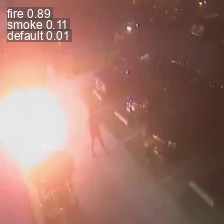

{0: 'default', 1: 'fire', 2: 'smoke'}
ultralytics.engine.results.Probs object with attributes:

data: tensor([0.0060, 0.8879, 0.1061], device='cuda:0')
orig_shape: None
shape: torch.Size([3])
top1: 1
top1conf: tensor(0.8879, device='cuda:0')
top5: [1, 2, 0]
top5conf: tensor([0.8879, 0.1061, 0.0060], device='cuda:0')
Prediction: fire (88.79% confidence)


In [9]:
from ultralytics import YOLO

# Load the best model
model = YOLO('runs/classify/fire_classification_yolo11m/weights/best.pt')

# Predict on a single image
results = model.predict('/content/fire-img_data/val/fire/img_103.jpg')

# Show results
for r in results:
    r.show()       # Display in Colab
    print(r.names) # Class labels mapping
    print(r.probs) # Probabilities per class

result = results[0]
pred_class = result.names[result.probs.top1]
pred_conf = result.probs.top1conf.item()
print(f"Prediction: {pred_class} ({pred_conf:.2%} confidence)")



In [11]:
from google.colab import files
import shutil

# Zip your working directory (replace '/content/runs/classify/train' if needed)
shutil.make_archive('/content/project_backup', 'zip', '/content')

# Download the ZIP
files.download('/content/project_backup.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import os

# Path to your runs directory
runs_dir = "/content/runs"

# Walk through the folder structure and print
for root, dirs, files in os.walk(runs_dir):
    level = root.replace(runs_dir, "").count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = " " * 4 * (level + 1)
    for f in files:
        print(f"{sub_indent}{f}")


runs/
    classify/
        fire_classification_yolo11m/
            results.png
            val_batch2_pred.jpg
            confusion_matrix.png
            val_batch0_labels.jpg
            train_batch1.jpg
            train_batch441.jpg
            train_batch0.jpg
            results.csv
            train_batch2.jpg
            val_batch1_pred.jpg
            val_batch1_labels.jpg
            val_batch2_labels.jpg
            train_batch442.jpg
            val_batch0_pred.jpg
            args.yaml
            confusion_matrix_normalized.png
            train_batch440.jpg
            weights/
                last.pt
                best.pt


In [15]:
# Path to best model (YOLO saves best model as best.pt)
from google.colab import files
import shutil

best_model_path = "/content/runs/classify/fire_classification_yolo11m/weights/best.pt"
files.download(best_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>